# SALES PREDICTION USING Scikit-Learn, PANDAS AND NUMPY

In [10]:
# Load Libraries

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [12]:
# DataSet : Advertising Sales

In [13]:
data = pd.read_csv('AdvSales.csv',index_col=0)
print(data.shape)
print(data.columns)
type(data)
#we have to predict sales

(200, 4)
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


pandas.core.frame.DataFrame

In [14]:
# STEP 1 :Find relationship of each feature with label respectively by making a pairplot using seaborn library .

C:\Users\smenon\newfolder\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


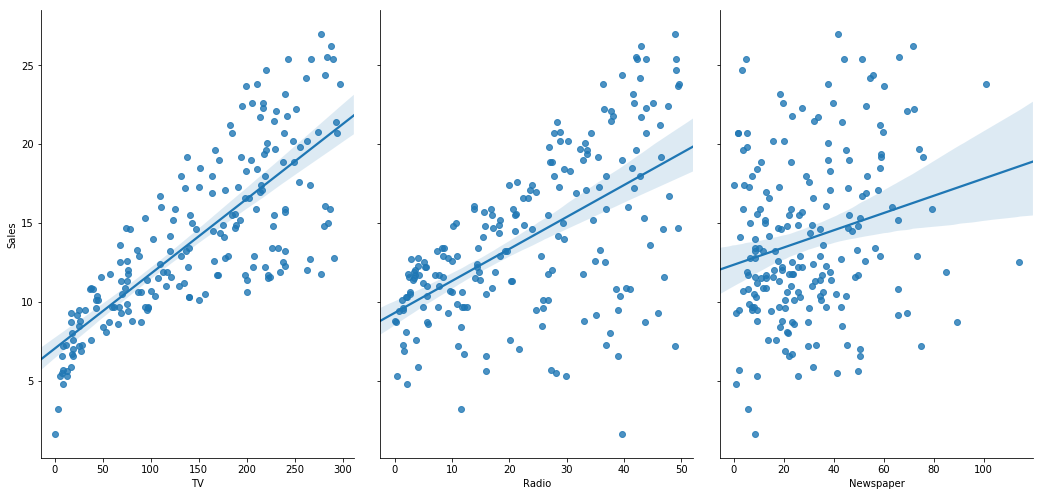

In [15]:
sns.pairplot(data,x_vars=data.columns[:3],y_vars=data.columns[3:],size=7,aspect=0.7,kind='reg')

In [16]:
# Step 2:  Use pandas correaltion function to find the corealtion between each feature all toghether.

In [17]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [18]:
# Observation: TV advertisments are more linear,had the biggest impact on sales, then radio and newspapaer. Newspaper,infact had the lowest affect on the sales.

In [19]:
# Step 3:  Use sklearn's `train_test_split` to split the data into training and testing

In [20]:
feature_cols=data.columns[:3]
#feature_cols = ['TV','Radio','Newspaper']   
X=data[feature_cols]

label_cols= data.columns[3:]
#label_cols= ['Sales']
Y=data[label_cols]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)
#default size is test_size=0.25 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 3)
(120, 1)
(80, 3)
(80, 1)


In [21]:
# Create the model

In [22]:
lnrg = LinearRegression()

In [23]:
# Fit the model to the training data. 

In [24]:

lnrg.fit(x_train,y_train)

#formula of linear regression is y = bias + [coef1]x1 + [coef2]x2 + [coef3]x3... 

print("linear regression bias or intercept   => ",lnrg.intercept_)   #intercept=bias
print("linear regression coefficient         => ",lnrg.coef_)
print("feature columns                       => ",feature_cols)


linear regression bias or intercept   =>  [2.96271388]
linear regression coefficient         =>  [[ 0.04528155  0.19916737 -0.00848792]]
feature columns                       =>  Index(['TV', 'Radio', 'Newspaper'], dtype='object')


In [31]:
# Calculate the root_mean_squared_error and the r-squared value for the testing data

### BEGIN SOLUTION
# Use our model to make predictions
y_hat = lnrg.predict(x_test)
# Score the predictions with rmse
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_hat))
r2 = r2_score(y_test, y_hat)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")
### END SOLUTION
#the less score the better

Root Mean Squared Error (RMSE): 1.840313298807108
R-squared (R2 ): 0.8554285259094516


In [32]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
lnrg.score(x_test, y_test)
### END SOLUTION

0.8554285259094516

In [ ]:
 Step 4: Use a metric to calculate Error , run linear regression 1000 times and calculate the average mean squared error and mean square error

## Root Mean Square error wth TV and radio as features 
score=0
for i in range(0,1000):
    feature_cols = ['TV','Radio']   
    X=data[feature_cols]
    Y=data.Sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

In [12]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','Radio','Newspaper']   
    X=data[feature_cols]
    Y=data.Sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.7064672823236582

In [13]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','Radio']   
    X=data[feature_cols]
    Y=data.Sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.904438618371681

In [14]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','Radio','Newspaper']   
    X=data[feature_cols]
    Y=data.Sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.9970670746628683

# using cross validation to check best features

In [15]:
#all features
feature_cols = ['TV','Radio','Newspaper']
X=data[feature_cols]
Y=data.Sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores  #cross_val_score give result in negative result so we negate it to get positive result
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

# the less the better

1.6913531708051792


In [16]:
# with some features
feature_cols = ['TV','Radio']
X=data[feature_cols]
Y=data.Sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6796748419090766


In [ ]:
Observation : I got 1.69 root mean squared error when I used all features and 1.67 when i used 
    only tv and radio. So while using 2 features tv and radio the model is able to ake better prediction.
    